In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

In [2]:
import requests
import urllib
from bs4 import BeautifulSoup
import re
import io
import gzip
import time
import csv
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from multiprocessing import Pool
import import_ipynb
import pandas as pd
from ipynb.fs.full.scrape_daily import scrape_daily

driver = webdriver.Chrome(ChromeDriverManager().install())
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
driver.get(url)

symbols = list()
symbols_GICC = dict()

table = "/html/body/div[3]/div[3]/div[5]/div[1]/table[1]"
table = driver.find_element_by_xpath(table)
elements = table.find_elements_by_tag_name("tr")[1:]

for row in elements:
    data = [data.text for data in row.find_elements_by_tag_name("td")]
    symbols.append(data[0])
    symbols_GICC[data[0]] = data[3]

print(len(symbols_GICC))



====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Driver [C:\Users\shiri\.wdm\drivers\chromedriver\win32\91.0.4472.19\chromedriver.exe] found in cache


505


In [3]:
top_gain_loss_daily = pd.DataFrame(columns=["symbol","gain_loss","GICS"])
top_gain_loss_weekly = pd.DataFrame(columns=["symbol","gain_loss","GICS"])
top_gain_loss_monthly = pd.DataFrame(columns=["symbol","gain_loss","GICS"])

In [4]:
daily_dfs = {}
weekly_dfs = {}
monthly_dfs = {}


def gain_loss(sym):
    df_daily = pd.read_csv(sym +"_daily" + ".csv")
    df_daily["Gain/Loss"] = (df_daily["Close"] - df_daily["Close"].shift(1)) / df_daily["Close"]
    daily_dfs[sym] = df_daily
    print(daily_dfs[sym])

    df_weekly = pd.read_csv(sym +"_weekly"+".csv")
    df_weekly["Gain/Loss"] = (df_weekly["Close"] - df_weekly["Close"].shift(1)) / df_weekly["Close"]
    weekly_dfs[sym] = df_weekly

    df_monthly = pd.read_csv(sym + "_monthly" + ".csv")
    df_monthly["Gain/Loss"] = (df_monthly["Close"] - df_monthly["Close"].shift(1)) / df_weekly["Close"]
    monthly_dfs[sym] = df_monthly
    
    daily = {"symbol":sym,"gain_loss":df_daily["Gain/Loss"].sum(),"GICS":symbols_GICC[sym]}
    weekly = {"symbol":sym,"gain_loss":df_weekly["Gain/Loss"].sum(),"GICS":symbols_GICC[sym]}
    monthly = {"symbol":sym,"gain_loss":df_monthly["Gain/Loss"].sum(),"GICS":symbols_GICC[sym]}
    return (daily,weekly,monthly)

In [5]:
for n in symbols:
    try:
        (daily,weekly,monthly) = gain_loss(n)
        top_gain_loss_daily = top_gain_loss_daily.append(daily, ignore_index=True)
        top_gain_loss_weekly = top_gain_loss_weekly.append(weekly, ignore_index=True)
        top_gain_loss_monthly = top_gain_loss_monthly.append(monthly, ignore_index=True)
    except Exception as e :
        pass

      Unnamed: 0        Date       Open       High        Low      Close  \
0              0  2016-01-04  27.110001  27.250000  26.080000  26.430000   
1              1  2016-01-05  26.610001  26.860001  25.940001  26.120001   
2              2  2016-01-06  25.830000  26.660000  25.770000  26.410000   
3              3  2016-01-07  25.799999  26.469999  25.600000  25.690001   
4              4  2016-01-08  25.969999  26.160000  25.670000  25.750000   
...          ...         ...        ...        ...        ...        ...   
1254        1254  2020-12-24  51.230000  51.240002  49.939999  50.119999   
1255        1255  2020-12-28  50.500000  50.549999  49.930000  50.240002   
1256        1256  2020-12-29  50.650002  51.110001  50.299999  50.860001   
1257        1257  2020-12-30  51.020000  51.509998  50.470001  50.549999   
1258        1258  2020-12-31  50.610001  50.810001  50.000000  50.250000   

      Adj Close    Volume  Gain/Loss  
0     25.509241  19107600        NaN  
1     25.

      Unnamed: 0        Date       Open       High        Low      Close  \
0              0  2016-01-04  66.339996  66.980003  65.519997  66.959999   
1              1  2016-01-05  67.300003  68.500000  67.010002  68.180000   
2              2  2016-01-06  66.769997  71.099998  66.610001  69.889999   
3              3  2016-01-07  68.500000  70.300003  68.029999  69.120003   
4              4  2016-01-08  69.250000  69.570000  67.910004  68.040001   
...          ...         ...        ...        ...        ...        ...   
1254        1254  2020-12-24  93.220001  93.339996  92.010002  93.150002   
1255        1255  2020-12-28  93.510002  94.150002  92.830002  93.339996   
1256        1256  2020-12-29  93.779999  93.800003  92.209999  93.379997   
1257        1257  2020-12-30  93.309998  94.839996  93.010002  94.000000   
1258        1258  2020-12-31  93.750000  94.190002  92.800003  93.540001   

      Adj Close   Volume  Gain/Loss  
0     57.746155  1214900        NaN  
1     58.79

      Unnamed: 0        Date        Open        High         Low       Close  \
0              0  2016-01-04   76.610001   76.610001   74.750000   75.739998   
1              1  2016-01-05   75.739998   76.050003   74.190002   75.000000   
2              2  2016-01-06   74.099998   74.720001   73.690002   74.169998   
3              3  2016-01-07   73.000000   73.419998   72.190002   72.610001   
4              4  2016-01-08   72.919998   72.919998   71.589996   71.639999   
...          ...         ...         ...         ...         ...         ...   
1254        1254  2020-12-24  194.899994  196.559998  192.889999  196.559998   
1255        1255  2020-12-28  197.500000  198.880005  195.539993  195.910004   
1256        1256  2020-12-29  196.429993  197.309998  193.059998  195.229996   
1257        1257  2020-12-30  196.210007  197.300003  195.729996  196.630005   
1258        1258  2020-12-31  196.889999  199.449997  195.970001  199.199997   

       Adj Close  Volume  Gain/Loss  
0

      Unnamed: 0        Date       Open       High        Low      Close  \
0              0  2016-01-04  94.599998  94.720001  93.309998  94.000000   
1              1  2016-01-05  94.430000  96.870003  94.050003  96.489998   
2              2  2016-01-06  95.339996  96.320000  93.699997  94.639999   
3              3  2016-01-07  94.000000  97.330002  93.900002  96.519997   
4              4  2016-01-08  96.949997  97.389999  92.839996  93.230003   
...          ...         ...        ...        ...        ...        ...   
1254        1254  2020-12-24  39.250000  39.250000  38.230000  38.959999   
1255        1255  2020-12-28  39.070000  39.680000  38.759998  38.820000   
1256        1256  2020-12-29  38.720001  38.720001  36.939999  37.590000   
1257        1257  2020-12-30  37.750000  38.630001  37.400002  38.029999   
1258        1258  2020-12-31  37.950001  38.049999  37.139999  37.189999   

      Adj Close   Volume  Gain/Loss  
0     73.443382  2068000        NaN  
1     75.38

      Unnamed: 0        Date       Open       High        Low      Close  \
0              0  2016-01-04  37.750000  37.820000  37.150002  37.779999   
1              1  2016-01-05  37.759998  38.009998  37.700001  37.889999   
2              2  2016-01-06  37.279999  37.410000  36.790001  37.049999   
3              3  2016-01-07  36.320000  36.820000  36.130001  36.160000   
4              4  2016-01-08  36.360001  36.529999  35.860001  35.900002   
...          ...         ...        ...        ...        ...        ...   
1254        1254  2020-12-24  44.110001  44.240002  43.740002  44.000000   
1255        1255  2020-12-28  44.299999  44.930000  44.200001  44.419998   
1256        1256  2020-12-29  44.630001  44.939999  43.980000  44.060001   
1257        1257  2020-12-30  44.049999  44.740002  43.930000  44.419998   
1258        1258  2020-12-31  44.290001  45.119999  44.270000  45.020000   

      Adj Close   Volume  Gain/Loss  
0     36.650410  1629400        NaN  
1     36.75

      Unnamed: 0        Date       Open       High        Low      Close  \
0              0  2016-01-04  79.550003  79.879997  78.370003  79.839996   
1              1  2016-01-05  79.849998  80.339996  78.830002  79.570000   
2              2  2016-01-06  78.059998  78.290001  76.370003  76.919998   
3              3  2016-01-07  75.050003  75.959999  73.489998  73.790001   
4              4  2016-01-08  74.900002  75.419998  72.860001  73.050003   
...          ...         ...        ...        ...        ...        ...   
1254        1254  2020-12-24  76.800003  77.019997  75.870003  76.739998   
1255        1255  2020-12-28  77.160004  78.620003  76.699997  76.910004   
1256        1256  2020-12-29  77.209999  77.580002  76.139999  76.339996   
1257        1257  2020-12-30  76.550003  77.680000  76.440002  77.449997   
1258        1258  2020-12-31  77.309998  78.230003  76.910004  78.070000   

      Adj Close   Volume  Gain/Loss  
0     63.360798  2918100        NaN  
1     63.14

      Unnamed: 0        Date        Open        High         Low       Close  \
0              0  2016-01-04   49.680000   50.799999   48.720001   50.720001   
1              1  2016-01-05   50.759998   50.970001   47.360001   47.529999   
2              2  2016-01-06   46.660000   46.689999   44.160000   44.619999   
3              3  2016-01-07   44.500000   47.110001   44.110001   45.639999   
4              4  2016-01-08   43.049999   45.320000   42.400002   44.490002   
...          ...         ...         ...         ...         ...         ...   
1254        1254  2020-12-24  166.039993  167.529999  165.130005  167.110001   
1255        1255  2020-12-28  170.029999  170.500000  166.009995  166.440002   
1256        1256  2020-12-29  166.979996  167.429993  162.587006  163.770004   
1257        1257  2020-12-30  164.550003  167.429993  164.550003  167.369995   
1258        1258  2020-12-31  168.869995  168.869995  165.619995  166.270004   

       Adj Close   Volume  Gain/Loss  


      Unnamed: 0        Date        Open        High         Low       Close  \
0              0  2016-01-04   84.980003   85.669998   83.169998   84.070000   
1              1  2016-01-05   84.510002   85.550003   83.470001   84.000000   
2              2  2016-01-06   82.879997   83.070000   80.699997   81.419998   
3              3  2016-01-07   79.680000   81.650002   78.930000   79.639999   
4              4  2016-01-08   80.110001   80.650002   77.889999   78.120003   
...          ...         ...         ...         ...         ...         ...   
1254        1254  2020-12-24  555.299988  560.539978  552.739990  553.890015   
1255        1255  2020-12-28  563.000000  563.000000  540.900024  543.739990   
1256        1256  2020-12-29  550.219971  551.630005  539.299988  545.979980   
1257        1257  2020-12-30  550.820007  552.000000  544.659973  547.380005   
1258        1258  2020-12-31  547.010010  551.080017  543.710022  550.429993   

       Adj Close   Volume  Gain/Loss  


      Unnamed: 0        Date        Open        High         Low       Close  \
0              0  2016-01-04  104.940002  105.000000  103.660004  104.870003   
1              1  2016-01-05  105.160004  105.599998  102.440002  102.709999   
2              2  2016-01-06  101.330002  102.830002  100.820000  101.290001   
3              3  2016-01-07   99.120003  100.370003   98.279999   98.410004   
4              4  2016-01-08   98.589996   98.930000   96.279999   96.440002   
...          ...         ...         ...         ...         ...         ...   
1254        1254  2020-12-24  178.639999  180.169998  177.529999  179.919998   
1255        1255  2020-12-28  181.070007  181.399994  176.690002  177.289993   
1256        1256  2020-12-29  178.149994  178.149994  174.350006  176.270004   
1257        1257  2020-12-30  176.250000  178.889999  176.250000  178.300003   
1258        1258  2020-12-31  178.039993  179.179993  177.000000  178.559998   

       Adj Close   Volume  Gain/Loss  


      Unnamed: 0        Date        Open        High         Low       Close  \
0              0  2016-01-04   45.110001   45.110001   44.000000   44.919998   
1              1  2016-01-05   45.150002   46.000000   44.549999   44.970001   
2              2  2016-01-06   44.369999   44.860001   43.959999   44.310001   
3              3  2016-01-07   43.500000   43.990002   43.090000   43.279999   
4              4  2016-01-08   43.459999   43.650002   42.279999   42.349998   
...          ...         ...         ...         ...         ...         ...   
1254        1254  2020-12-24  255.000000  257.480011  253.809998  256.279999   
1255        1255  2020-12-28  261.130005  261.130005  254.419998  256.160004   
1256        1256  2020-12-29  257.769989  258.339996  252.779999  253.820007   
1257        1257  2020-12-30  255.369995  258.339996  254.860001  256.910004   
1258        1258  2020-12-31  257.950012  259.519989  256.500000  259.239990   

       Adj Close   Volume  Gain/Loss  


      Unnamed: 0        Date        Open        High         Low       Close  \
0              0  2016-01-04   20.459999   20.480000   20.129999   20.340000   
1              1  2016-01-05   20.340000   20.600000   20.240000   20.510000   
2              2  2016-01-06   20.129999   20.280001   19.870001   20.040001   
3              3  2016-01-07   19.480000   19.879999   19.459999   19.510000   
4              4  2016-01-08   19.580000   19.650000   19.059999   19.110001   
...          ...         ...         ...         ...         ...         ...   
1254        1254  2020-12-24  117.690002  118.900002  116.830002  118.879997   
1255        1255  2020-12-28  120.080002  120.220001  117.430000  117.730003   
1256        1256  2020-12-29  118.919998  119.070000  116.400002  117.199997   
1257        1257  2020-12-30  118.250000  120.720001  118.010002  120.290001   
1258        1258  2020-12-31  120.120003  120.709999  118.370003  119.889999   

       Adj Close   Volume  Gain/Loss  


      Unnamed: 0        Date        Open        High         Low       Close  \
0              0  2016-01-04  110.709999  110.959999  108.730003  109.970001   
1              1  2016-01-05  109.919998  110.730003  109.540001  110.470001   
2              2  2016-01-06  109.339996  109.790001  108.570000  109.040001   
3              3  2016-01-07  107.500000  108.440002  106.029999  106.440002   
4              4  2016-01-08  107.010002  107.440002  105.830002  105.989998   
...          ...         ...         ...         ...         ...         ...   
1254        1254  2020-12-24  138.059998  138.639999  136.839996  138.490005   
1255        1255  2020-12-28  138.830002  139.880005  138.470001  139.190002   
1256        1256  2020-12-29  139.580002  139.649994  138.029999  138.350006   
1257        1257  2020-12-30  138.949997  139.899994  138.850006  139.080002   
1258        1258  2020-12-31  139.080002  140.539993  138.110001  140.369995   

       Adj Close   Volume  Gain/Loss  


      Unnamed: 0        Date       Open       High        Low      Close  \
0              0  2016-01-04  56.000000  56.799999  55.509998  56.740002   
1              1  2016-01-05  56.799999  58.029999  56.660000  57.740002   
2              2  2016-01-06  57.669998  57.779999  56.730000  57.209999   
3              3  2016-01-07  56.630001  57.080002  56.009998  56.209999   
4              4  2016-01-08  56.380001  56.840000  56.009998  56.259998   
...          ...         ...        ...        ...        ...        ...   
1254        1254  2020-12-24  49.209999  49.540001  48.849998  49.189999   
1255        1255  2020-12-28  49.320000  49.360001  48.599998  49.360001   
1256        1256  2020-12-29  49.410000  49.730000  48.750000  49.029999   
1257        1257  2020-12-30  48.990002  49.830002  48.570000  48.860001   
1258        1258  2020-12-31  48.419998  49.080002  47.799999  49.040001   

      Adj Close   Volume  Gain/Loss  
0     43.329063  2820900        NaN  
1     44.09

In [6]:
print(top_gain_loss_daily)
print(top_gain_loss_weekly)
print(top_gain_loss_monthly)


   symbol  gain_loss                    GICS
0    EBAY   0.429091  Consumer Discretionary
1     ECL   0.481382               Materials
2     EIX  -0.170670               Utilities
3      EW   0.969252             Health Care
4      EA   0.520431  Communication Services
5     EMR   0.285292             Industrials
6     LKQ  -0.152681  Consumer Discretionary
7     LMT   0.359774             Industrials
8       L  -0.059483              Financials
9     PGR   1.010607              Financials
10    PLD   0.679210             Real Estate
11    PRU  -0.380816              Financials
12    PTC   0.969237  Information Technology
13    PEG   0.274897               Utilities
14    PSA  -0.195083             Real Estate
15    PHM   0.563486  Consumer Discretionary
16    PVH  -0.361834  Consumer Discretionary
17   QRVO   0.740016  Information Technology
18    PWR   1.020624             Industrials
19   QCOM   0.778858  Information Technology
20     SO   0.115423               Utilities
21    LUV 

In [7]:
top_gain_loss_daily = top_gain_loss_daily.sort_values(by=["gain_loss"])
top_25_daily = top_gain_loss_daily.head(25)
loss_25_daily = top_gain_loss_daily.tail(25)
top_25_daily_names = list(top_25_daily["symbol"])
loss_25_daily_names = list(loss_25_daily["symbol"])
names = set(loss_25_daily_names+top_25_daily_names)
samp = pd.DataFrame(columns=names,index=names)
for n1,n2 in combinations(names,2):
    df1 = daily_dfs[n1]
    df2 = daily_dfs[n2]
    samp.loc[n1,n2] = df1["Gain/Loss"].corr(df2["Gain/Loss"])
    samp.loc[n2,n1] = df2["Gain/Loss"].corr(df1["Gain/Loss"])
    samp.loc[n1,n1] = 1
    samp.loc[n2,n2] = 1
daily_samp = samp.astype({name:"float" for name in names})
daily_samp.style.background_gradient(cmap="brg")

,LMT,LKQ,UNM,PTC,QCOM,TMUS,VNO,L,SWK,SYK,QRVO,V,SYF,UHS,STE,SO,VLO,EBAY,SBUX,SIVB,ECL,TTWO,ZTS,EIX,EW,STT,URI,PSA,VTRS,PEG,PRU,SYY,PHM,EA,UPS,SNPS,LUV,VTR,PVH,EMR,TROW,PGR,PWR,PLD
LMT,1.000000,0.415167,0.529988,0.348813,0.318335,0.364006,0.434488,0.545851,0.497064,0.497889,0.335295,0.542789,0.456716,0.390610,0.481670,0.492651,0.415769,0.304477,0.438666,0.407575,0.510071,0.244087,0.502083,0.398805,0.394448,0.444051,0.406043,0.408405,0.283442,0.407481,0.570280,0.451896,0.396423,0.268689,0.432638,0.443797,0.417627,0.372727,0.409426,0.473628,0.585832,0.463640,0.466275,0.482363
LKQ,0.415167,1.000000,0.589912,0.429331,0.396951,0.364030,0.546318,0.569378,0.659543,0.519080,0.455144,0.559903,0.641891,0.599507,0.483950,0.340833,0.557828,0.314631,0.496296,0.541525,0.560169,0.162582,0.471728,0.362705,0.380279,0.591011,0.582618,0.303340,0.303325,0.412204,0.613370,0.573966,0.561828,0.160020,0.359422,0.419205,0.464999,0.495277,0.619229,0.646449,0.510428,0.328118,0.596654,0.432403
UNM,0.529988,0.589912,1.000000,0.404561,0.407812,0.402995,0.623753,0.743825,0.644140,0.502497,0.449661,0.564845,0.685413,0.539722,0.491527,0.405605,0.621753,0.295239,0.523271,0.658261,0.584744,0.161207,0.437230,0.421704,0.373282,0.731194,0.607047,0.284939,0.417856,0.441153,0.882247,0.573268,0.489328,0.194340,0.438135,0.405435,0.597734,0.515456,0.644096,0.668074,0.653661,0.453948,0.627144,0.476747
PTC,0.348813,0.429331,0.404561,1.000000,0.413795,0.414630,0.341513,0.414749,0.486346,0.470539,0.449713,0.578537,0.401867,0.371014,0.446727,0.206206,0.401047,0.364026,0.426945,0.455728,0.434008,0.372143,0.449203,0.226810,0.440894,0.424891,0.474213,0.213315,0.275166,0.266633,0.439733,0.368676,0.386511,0.361051,0.371581,0.572790,0.390552,0.306756,0.396592,0.482692,0.466548,0.315157,0.460688,0.397979
QCOM,0.318335,0.396951,0.407812,0.413795,1.000000,0.393446,0.335626,0.437438,0.490927,0.385349,0.581849,0.521835,0.410481,0.370255,0.398923,0.249824,0.377830,0.372395,0.431918,0.448166,0.426335,0.366231,0.412953,0.256761,0.352401,0.459795,0.490570,0.214866,0.311012,0.303246,0.452229,0.348758,0.356093,0.339216,0.442749,0.537659,0.333907,0.311475,0.358216,0.472368,0.474915,0.354409,0.385748,0.394621
TMUS,0.364006,0.364030,0.402995,0.414630,0.393446,1.000000,0.361538,0.429635,0.434368,0.441137,0.402302,0.505770,0.405501,0.367665,0.455214,0.291221,0.347793,0.322070,0.450798,0.425447,0.430868,0.370226,0.463342,0.288723,0.365666,0.419692,0.423208,0.318785,0.259946,0.335213,0.444294,0.387646,0.349590,0.338764,0.378260,0.494928,0.304781,0.318857,0.304134,0.411522,0.474137,0.351675,0.373002,0.412772
VNO,0.434488,0.546318,0.623753,0.341513,0.335626,0.361538,1.000000,0.649281,0.549099,0.514901,0.326571,0.525920,0.644107,0.602780,0.467228,0.481934,0.546298,0.208727,0.525582,0.493457,0.531344,0.132859,0.373788,0.463494,0.357649,0.549556,0.494675,0.483231,0.297724,0.585738,0.638738,0.639198,0.472835,0.185187,0.327893,0.356175,0.506689,0.695887,0.610117,0.507503,0.481746,0.286956,0.482838,0.590631
L,0.545851,0.569378,0.743825,0.414749,0.437438,0.429635,0.649281,1.000000,0.647499,0.614039,0.450100,0.629125,0.668070,0.599449,0.554770,0.497434,0.616784,0.290346,0.591720,0.662601,0.694730,0.216743,0.463770,0.465830,0.432392,0.679640,0.611353,0.389757,0.377143,0.525491,0.793813,0.600236,0.478277,0.231450,0.447147,0.459468,0.516360,0.517934,0.637304,0.702031,0.699102,0.476537,0.609026,0.504670
SWK,0.497064,0.659543,0.644140,0.486346,0.490927,0.434368,0.549099,0.647499,1.000000,0.581669,0.530670,0.654848,0.646787,0.563421,0.547324,0.386407,0.582136,0.379243,0.567296,0.608058,0.635106,0.280547,0.555031,0.397462,0.436935,0.653825,0.642910,0.356718,0.347216,0.450386,0.682965,0.548096,0.600438,0.267769,0.469601,0.537877,0.509817,0.489176,0.629540,0.694158,0.599457,0.435024,0.635776,0.505034
SYK,0.497889,0.519080,0.502497,0.470539,0.385349,0.441137,0.514901,0.614039,0.581669,1.000000,0.411674,0.682155,0.537556,0.594449,0.613959,0.495191,0.552291,0.326492,0.584416,0.510888,0.640441,0.288188,0.600154,0.425063,

In [8]:
top_gain_loss_weekly = top_gain_loss_weekly.sort_values(by=["gain_loss"])
top_25_daily = top_gain_loss_weekly.head(25)
loss_25_daily = top_gain_loss_weekly.tail(25)
top_25_daily_names = list(top_25_daily["symbol"])
loss_25_daily_names = list(loss_25_daily["symbol"])
names = set(loss_25_daily_names+top_25_daily_names)
samp = pd.DataFrame(columns=names,index=names)
for n1,n2 in combinations(names,2):
    df1 = daily_dfs[n1]
    df2 = daily_dfs[n2]
    samp.loc[n1,n2] = df1["Gain/Loss"].corr(df2["Gain/Loss"])
    samp.loc[n2,n1] = df2["Gain/Loss"].corr(df1["Gain/Loss"])
    samp.loc[n1,n1] = 1
    samp.loc[n2,n2] = 1
weekly_samp = samp.astype({name:"float" for name in names})
weekly_samp.style.background_gradient(cmap="brg")

,LMT,LKQ,UNM,PTC,QCOM,TMUS,VNO,L,SWK,SYK,QRVO,V,SYF,UHS,STE,SO,VLO,EBAY,SBUX,SIVB,ECL,TTWO,ZTS,EIX,EW,STT,URI,PSA,VTRS,PEG,PRU,SYY,EA,PHM,UPS,SNPS,LUV,VTR,PVH,EMR,TROW,PGR,PWR,PLD
LMT,1.000000,0.415167,0.529988,0.348813,0.318335,0.364006,0.434488,0.545851,0.497064,0.497889,0.335295,0.542789,0.456716,0.390610,0.481670,0.492651,0.415769,0.304477,0.438666,0.407575,0.510071,0.244087,0.502083,0.398805,0.394448,0.444051,0.406043,0.408405,0.283442,0.407481,0.570280,0.451896,0.268689,0.396423,0.432638,0.443797,0.417627,0.372727,0.409426,0.473628,0.585832,0.463640,0.466275,0.482363
LKQ,0.415167,1.000000,0.589912,0.429331,0.396951,0.364030,0.546318,0.569378,0.659543,0.519080,0.455144,0.559903,0.641891,0.599507,0.483950,0.340833,0.557828,0.314631,0.496296,0.541525,0.560169,0.162582,0.471728,0.362705,0.380279,0.591011,0.582618,0.303340,0.303325,0.412204,0.613370,0.573966,0.160020,0.561828,0.359422,0.419205,0.464999,0.495277,0.619229,0.646449,0.510428,0.328118,0.596654,0.432403
UNM,0.529988,0.589912,1.000000,0.404561,0.407812,0.402995,0.623753,0.743825,0.644140,0.502497,0.449661,0.564845,0.685413,0.539722,0.491527,0.405605,0.621753,0.295239,0.523271,0.658261,0.584744,0.161207,0.437230,0.421704,0.373282,0.731194,0.607047,0.284939,0.417856,0.441153,0.882247,0.573268,0.194340,0.489328,0.438135,0.405435,0.597734,0.515456,0.644096,0.668074,0.653661,0.453948,0.627144,0.476747
PTC,0.348813,0.429331,0.404561,1.000000,0.413795,0.414630,0.341513,0.414749,0.486346,0.470539,0.449713,0.578537,0.401867,0.371014,0.446727,0.206206,0.401047,0.364026,0.426945,0.455728,0.434008,0.372143,0.449203,0.226810,0.440894,0.424891,0.474213,0.213315,0.275166,0.266633,0.439733,0.368676,0.361051,0.386511,0.371581,0.572790,0.390552,0.306756,0.396592,0.482692,0.466548,0.315157,0.460688,0.397979
QCOM,0.318335,0.396951,0.407812,0.413795,1.000000,0.393446,0.335626,0.437438,0.490927,0.385349,0.581849,0.521835,0.410481,0.370255,0.398923,0.249824,0.377830,0.372395,0.431918,0.448166,0.426335,0.366231,0.412953,0.256761,0.352401,0.459795,0.490570,0.214866,0.311012,0.303246,0.452229,0.348758,0.339216,0.356093,0.442749,0.537659,0.333907,0.311475,0.358216,0.472368,0.474915,0.354409,0.385748,0.394621
TMUS,0.364006,0.364030,0.402995,0.414630,0.393446,1.000000,0.361538,0.429635,0.434368,0.441137,0.402302,0.505770,0.405501,0.367665,0.455214,0.291221,0.347793,0.322070,0.450798,0.425447,0.430868,0.370226,0.463342,0.288723,0.365666,0.419692,0.423208,0.318785,0.259946,0.335213,0.444294,0.387646,0.338764,0.349590,0.378260,0.494928,0.304781,0.318857,0.304134,0.411522,0.474137,0.351675,0.373002,0.412772
VNO,0.434488,0.546318,0.623753,0.341513,0.335626,0.361538,1.000000,0.649281,0.549099,0.514901,0.326571,0.525920,0.644107,0.602780,0.467228,0.481934,0.546298,0.208727,0.525582,0.493457,0.531344,0.132859,0.373788,0.463494,0.357649,0.549556,0.494675,0.483231,0.297724,0.585738,0.638738,0.639198,0.185187,0.472835,0.327893,0.356175,0.506689,0.695887,0.610117,0.507503,0.481746,0.286956,0.482838,0.590631
L,0.545851,0.569378,0.743825,0.414749,0.437438,0.429635,0.649281,1.000000,0.647499,0.614039,0.450100,0.629125,0.668070,0.599449,0.554770,0.497434,0.616784,0.290346,0.591720,0.662601,0.694730,0.216743,0.463770,0.465830,0.432392,0.679640,0.611353,0.389757,0.377143,0.525491,0.793813,0.600236,0.231450,0.478277,0.447147,0.459468,0.516360,0.517934,0.637304,0.702031,0.699102,0.476537,0.609026,0.504670
SWK,0.497064,0.659543,0.644140,0.486346,0.490927,0.434368,0.549099,0.647499,1.000000,0.581669,0.530670,0.654848,0.646787,0.563421,0.547324,0.386407,0.582136,0.379243,0.567296,0.608058,0.635106,0.280547,0.555031,0.397462,0.436935,0.653825,0.642910,0.356718,0.347216,0.450386,0.682965,0.548096,0.267769,0.600438,0.469601,0.537877,0.509817,0.489176,0.629540,0.694158,0.599457,0.435024,0.635776,0.505034
SYK,0.497889,0.519080,0.502497,0.470539,0.385349,0.441137,0.514901,0.614039,0.581669,1.000000,0.411674,0.682155,0.537556,0.594449,0.613959,0.495191,0.552291,0.326492,0.584416,0.510888,0.640441,0.288188,0.600154,0.425063,

In [9]:
top_gain_loss_monthly = top_gain_loss_monthly.sort_values(by=["gain_loss"])
top_25_daily = top_gain_loss_monthly.head(25)
loss_25_daily = top_gain_loss_monthly.tail(25)
top_25_daily_names = list(top_25_daily["symbol"])
loss_25_daily_names = list(loss_25_daily["symbol"])
names = set(loss_25_daily_names+top_25_daily_names)
samp = pd.DataFrame(columns=names,index=names)
for n1,n2 in combinations(names,2):
    df1 = daily_dfs[n1]
    df2 = daily_dfs[n2]
    samp.loc[n1,n2] = df1["Gain/Loss"].corr(df2["Gain/Loss"])
    samp.loc[n2,n1] = df2["Gain/Loss"].corr(df1["Gain/Loss"])
    samp.loc[n1,n1] = 1
    samp.loc[n2,n2] = 1
monthly_samp = samp.astype({name:"float" for name in names})
monthly_samp.style.background_gradient(cmap="brg")

,LMT,LKQ,UNM,PTC,QCOM,VNO,L,SWK,SYK,QRVO,V,SYF,UHS,STE,SO,VLO,EBAY,SBUX,SIVB,ECL,TTWO,ZTS,EIX,TROW,EW,URI,PSA,STT,VTRS,PEG,PRU,SYY,PHM,EA,SNPS,UPS,LUV,VTR,PVH,EMR,TMUS,PGR,PWR,PLD
LMT,1.000000,0.415167,0.529988,0.348813,0.318335,0.434488,0.545851,0.497064,0.497889,0.335295,0.542789,0.456716,0.390610,0.481670,0.492651,0.415769,0.304477,0.438666,0.407575,0.510071,0.244087,0.502083,0.398805,0.585832,0.394448,0.406043,0.408405,0.444051,0.283442,0.407481,0.570280,0.451896,0.396423,0.268689,0.443797,0.432638,0.417627,0.372727,0.409426,0.473628,0.364006,0.463640,0.466275,0.482363
LKQ,0.415167,1.000000,0.589912,0.429331,0.396951,0.546318,0.569378,0.659543,0.519080,0.455144,0.559903,0.641891,0.599507,0.483950,0.340833,0.557828,0.314631,0.496296,0.541525,0.560169,0.162582,0.471728,0.362705,0.510428,0.380279,0.582618,0.303340,0.591011,0.303325,0.412204,0.613370,0.573966,0.561828,0.160020,0.419205,0.359422,0.464999,0.495277,0.619229,0.646449,0.364030,0.328118,0.596654,0.432403
UNM,0.529988,0.589912,1.000000,0.404561,0.407812,0.623753,0.743825,0.644140,0.502497,0.449661,0.564845,0.685413,0.539722,0.491527,0.405605,0.621753,0.295239,0.523271,0.658261,0.584744,0.161207,0.437230,0.421704,0.653661,0.373282,0.607047,0.284939,0.731194,0.417856,0.441153,0.882247,0.573268,0.489328,0.194340,0.405435,0.438135,0.597734,0.515456,0.644096,0.668074,0.402995,0.453948,0.627144,0.476747
PTC,0.348813,0.429331,0.404561,1.000000,0.413795,0.341513,0.414749,0.486346,0.470539,0.449713,0.578537,0.401867,0.371014,0.446727,0.206206,0.401047,0.364026,0.426945,0.455728,0.434008,0.372143,0.449203,0.226810,0.466548,0.440894,0.474213,0.213315,0.424891,0.275166,0.266633,0.439733,0.368676,0.386511,0.361051,0.572790,0.371581,0.390552,0.306756,0.396592,0.482692,0.414630,0.315157,0.460688,0.397979
QCOM,0.318335,0.396951,0.407812,0.413795,1.000000,0.335626,0.437438,0.490927,0.385349,0.581849,0.521835,0.410481,0.370255,0.398923,0.249824,0.377830,0.372395,0.431918,0.448166,0.426335,0.366231,0.412953,0.256761,0.474915,0.352401,0.490570,0.214866,0.459795,0.311012,0.303246,0.452229,0.348758,0.356093,0.339216,0.537659,0.442749,0.333907,0.311475,0.358216,0.472368,0.393446,0.354409,0.385748,0.394621
VNO,0.434488,0.546318,0.623753,0.341513,0.335626,1.000000,0.649281,0.549099,0.514901,0.326571,0.525920,0.644107,0.602780,0.467228,0.481934,0.546298,0.208727,0.525582,0.493457,0.531344,0.132859,0.373788,0.463494,0.481746,0.357649,0.494675,0.483231,0.549556,0.297724,0.585738,0.638738,0.639198,0.472835,0.185187,0.356175,0.327893,0.506689,0.695887,0.610117,0.507503,0.361538,0.286956,0.482838,0.590631
L,0.545851,0.569378,0.743825,0.414749,0.437438,0.649281,1.000000,0.647499,0.614039,0.450100,0.629125,0.668070,0.599449,0.554770,0.497434,0.616784,0.290346,0.591720,0.662601,0.694730,0.216743,0.463770,0.465830,0.699102,0.432392,0.611353,0.389757,0.679640,0.377143,0.525491,0.793813,0.600236,0.478277,0.231450,0.459468,0.447147,0.516360,0.517934,0.637304,0.702031,0.429635,0.476537,0.609026,0.504670
SWK,0.497064,0.659543,0.644140,0.486346,0.490927,0.549099,0.647499,1.000000,0.581669,0.530670,0.654848,0.646787,0.563421,0.547324,0.386407,0.582136,0.379243,0.567296,0.608058,0.635106,0.280547,0.555031,0.397462,0.599457,0.436935,0.642910,0.356718,0.653825,0.347216,0.450386,0.682965,0.548096,0.600438,0.267769,0.537877,0.469601,0.509817,0.489176,0.629540,0.694158,0.434368,0.435024,0.635776,0.505034
SYK,0.497889,0.519080,0.502497,0.470539,0.385349,0.514901,0.614039,0.581669,1.000000,0.411674,0.682155,0.537556,0.594449,0.613959,0.495191,0.552291,0.326492,0.584416,0.510888,0.640441,0.288188,0.600154,0.425063,0.516160,0.591834,0.465012,0.390261,0.498501,0.327454,0.520588,0.589857,0.585118,0.468756,0.281391,0.531883,0.403414,0.421145,0.516514,0.526109,0.575962,0.441137,0.397902,0.471838,0.522283
QRVO,0.335295,0.455144,0.449661,0.449713,0.581849,0.326571,0.450100,0.530670,0.411674,1.000000,0.567005,0.439580,0.376527,0.461454,0.255812,0.408045,0.405860,0.411622,0.486761,0.447987,0.368932,0.456581,0.266124,0.501623,

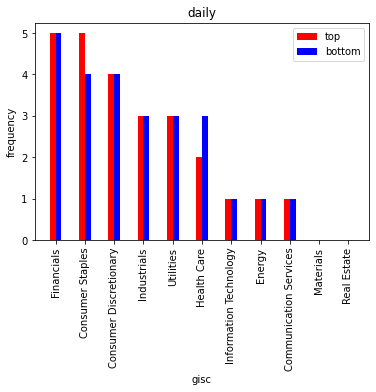

In [10]:
top_25 = dict(top_gain_loss_daily["GICS"].head(25).value_counts())
bottom_25 = dict(top_gain_loss_daily["GICS"].tail(25).value_counts())
labels = set(list(top_25.keys()) + list(bottom_25.keys()))
# print(labels)
# print(top_25)
# print(bottom_25)
for lab in labels:
    if lab in top_25:
        pass
    else:
        top_25[lab] = 0
    if lab in bottom_25:
        pass
    else:
        bottom_25[lab] = 0
# print(top_25)
# print(bottom_25)
w = 0.2
ind = np.arange(len(labels))
ind2 = [i+w for i in ind]
plt.bar(ind,top_25.values(),w,color="r",label="top")
plt.bar(ind2,bottom_25.values(),w,color="b",label="bottom")
plt.xlabel("gisc")
plt.ylabel("frequency")
plt.xticks(ind+w/2,labels,rotation=90)
plt.title("daily")
plt.legend()

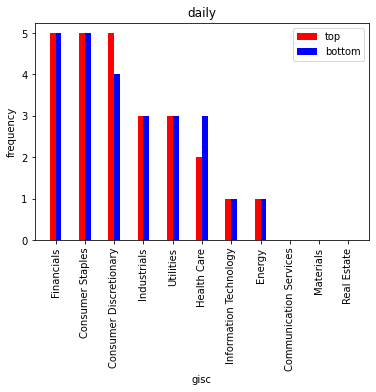

In [11]:
top_25 = dict(top_gain_loss_weekly["GICS"].head(25).value_counts())
bottom_25 = dict(top_gain_loss_weekly["GICS"].tail(25).value_counts())
labels = set(list(top_25.keys()) + list(bottom_25.keys()))
labels
for lab in labels:
    if lab in top_25:
        pass
    else:
        top_25[lab] = 0
    if lab in bottom_25:
        pass
    else:
        bottom_25[lab] = 0
        # top,bottom
w = 0.2
ind = np.arange(len(labels))
ind2 = [i+w for i in ind]
plt.bar(ind,top_25.values(),w,color="r",label="top")
plt.bar(ind2,bottom_25.values(),w,color="b",label="bottom")
plt.xlabel("gisc")
plt.ylabel("frequency")
plt.xticks(ind+w/2,labels,rotation=90)
plt.title("daily")
plt.legend()

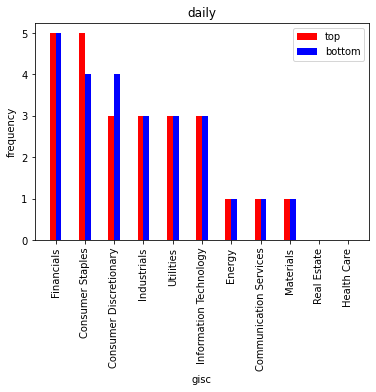

In [12]:
top_25 = dict(top_gain_loss_monthly["GICS"].head(25).value_counts())
bottom_25 = dict(top_gain_loss_monthly["GICS"].tail(25).value_counts())
labels = set(list(top_25.keys()) + list(bottom_25.keys()))
labels
for lab in labels:
    if lab in top_25:
        pass
    else:
        top_25[lab] = 0
    if lab in bottom_25:
        pass
    else:
        bottom_25[lab] = 0
        # top,bottom
w = 0.2
ind = np.arange(len(labels))
ind2 = [i+w for i in ind]
plt.bar(ind,top_25.values(),w,color="r",label="top")
plt.bar(ind2,bottom_25.values(),w,color="b",label="bottom")
plt.xlabel("gisc")
plt.ylabel("frequency")
plt.xticks(ind+w/2,labels,rotation=90)
plt.title("daily")
plt.legend()

In [13]:
import base64


def spark_line(data, figsize=(4, 0.25), **kwags):
    """
    Returns a HTML image tag containing a base64 encoded sparkline style plot
    """
    data = list(data)

    fig, ax = plt.subplots(1, 1, figsize=figsize, **kwags)
    ax.plot(data)
    for k,v in ax.spines.items():
        v.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

    plt.plot(len(data) - 1, data[len(data) - 1], 'r.')

    ax.fill_between(range(len(data)), data, len(data)*[min(data)], alpha=0.1)

    img = io.BytesIO()
    plt.savefig(img, transparent=True, bbox_inches='tight')
    img.seek(0)
    plt.close()

    return base64.b64encode(img.read()).decode("UTF-8")

In [14]:
top_four = list()
top_2 = top_gain_loss_daily.head(2)
for sym in top_2["symbol"]:
    tsym = daily_samp[sym].sort_values().index[0]
    top_four.append(sym)
    top_four.append(tsym)
all_values = list()
for num in top_four:
    val = list(daily_dfs[num]["Gain/Loss"].dropna().values)
    all_values.append(val)
with open("spark1.html", "a") as file:
        file.write('<div>Daily top</div>')
        for value in all_values:
            file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(spark_line(value)))
        file.write('<div></div>')

bottom_four = list()
bottom_2 = top_gain_loss_daily.tail(2)
for sym in bottom_2["symbol"]:
    tsym = daily_samp[sym].sort_values().index[0]
    bottom_four.append(sym)
    bottom_four.append(tsym)
all_values = list()
for num in bottom_four:
    val = list(daily_dfs[num]["Gain/Loss"].dropna().values)
    all_values.append(val)
with open("spark1.html", "a") as file:
        file.write('<div>Daily bottom</div>')
        for value in all_values:
            file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(spark_line(value)))
        file.write('<div></div>')

In [15]:
top_four = list()
top_2 = top_gain_loss_weekly.head(2)
for sym in top_2["symbol"]:
    tsym = weekly_samp[sym].sort_values().index[0]
    top_four.append(sym)
    top_four.append(tsym)
all_values = list()
for num in top_four:
    val = list(weekly_dfs[num]["Gain/Loss"].dropna().values)
    all_values.append(val)
with open("spark1.html", "a") as file:
        file.write('<div>Weekly top</div>')
        for value in all_values:
            file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(spark_line(value)))
        file.write('<div></div>')

bottom_four = list()
bottom_2 = top_gain_loss_weekly.tail(2)
for sym in bottom_2["symbol"]:
    tsym = weekly_samp[sym].sort_values().index[0]
    bottom_four.append(sym)
    bottom_four.append(tsym)
all_values = list()
for num in bottom_four:
    val = list(weekly_dfs[num]["Gain/Loss"].dropna().values)
    all_values.append(val)
with open("spark1.html", "a") as file:
        file.write('<div>Weekly bottom</div>')
        for value in all_values:
            file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(spark_line(value)))
        file.write('<div></div>')

In [16]:
top_four = list()
top_2 = top_gain_loss_monthly.head(2)
for sym in top_2["symbol"]:
    tsym = monthly_samp[sym].sort_values().index[0]
    top_four.append(sym)
    top_four.append(tsym)
all_values = list()
for num in top_four:
    val = list(monthly_dfs[num]["Gain/Loss"].dropna().values)
    all_values.append(val)
with open("spark1.html", "a") as file:
        file.write('<div>Monthly top</div>')
        for value in all_values:
            file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(spark_line(value)))
        file.write('<div></div>')

bottom_four = list()
bottom_2 = top_gain_loss_monthly.tail(2)
for sym in bottom_2["symbol"]:
    tsym = monthly_samp[sym].sort_values().index[0]
    bottom_four.append(sym)
    bottom_four.append(tsym)
all_values = list()
for num in bottom_four:
    val = list(monthly_dfs[num]["Gain/Loss"].dropna().values)
    all_values.append(val)
with open("spark1.html", "a") as file:
        file.write('<div>Monthly bottom</div>')
        for value in all_values:
            file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(spark_line(value)))
        file.write('<div></div>')

In [17]:
pip install pdfcrowd

Note: you may need to restart the kernel to use updated packages.


In [18]:
import pdfcrowd

client = pdfcrowd.HtmlToPdfClient('demo', 'ce544b6ea52a5621fb9d55f8b542d14d')
client.convertFileToFile('spark1.html', 'spark1.pdf')